# Readme

* start acq X1 X2 X3 -------> X1 is PP in ns, X2 is PN in ns, X3 is PD in ns this starts the acquisitions syncing with the pulse.
* write dac X -------> X is the dac number I forgot the min and the max but it may be from 0 to 400.
* write mux XXXX ---> where XXXX is the word to be sent to the MAX14866.
* clear mux -- opens every switch
* set mux -- closes every switch
* read -------> read the obtained acquisitions (8000pts).

In [1]:
%load_ext autoreload
%autoreload 2

from pico import Pic0rick, pplot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial   
import datetime
import time
import glob
import os


/home/kelu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Creates pairs of switches to check

In [2]:
TODO = []
for k in range(1023): 
    lst = [int(x) for x in bin(k)[2:]]
    ODD = np.sum(lst[1::2])
    EVEN = np.sum(lst[: : 2])
    if ( (ODD ==1 ) and (EVEN == 1) ) or (k == 0):
        TODO.append(k)
print(len(TODO))

26


# Open the device

In [3]:
p = Pic0rick()

Device on /dev/ttyACM0


## Running the acquisitions

In [44]:
gain = 100
i = 0
signals = []
for k in TODO:
    i = i+1
    MUX = f"0x{k:04x}"[2:]
    IMG = "imgs/rp2350_mux/"+MUX+".jpg"
    if not os.path.isfile(IMG):
        print("Doing value:",k)

        p.setmux(MUX)
        p.dac(gain+20*i)
        p.pulse(125,125,7000)
        signal = p.read()
        signals.append(signal)
        #pplot(signal, G= gain+20*i)

Doing value: 0


b'run> write mux 0000\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 3
b'run> write mux 0003\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 6
b'run> write mux 0006\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 9
b'run> write mux 0009\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 12
b'run> write mux 000c\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 18
b'run> write mux 0012\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 24
b'run> write mux 0018\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 33
b'run> write mux 0021\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
8001
Doing value: 36
b'run> write mux 0024\r\n' b'MAX14866 writing start

# Comparing envelopes

In [45]:
from scipy.signal import hilbert as h

In [46]:
def H(signal,k=50):
    ENV = []
    signal = np.abs(signal)
    for x in range(len(signal)//k-1):
        ENV.append(np.mean(signal[x*k:(x+1)*k]))
    return np.array(ENV)



/tmp/ipykernel_64773/4232753851.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,5))


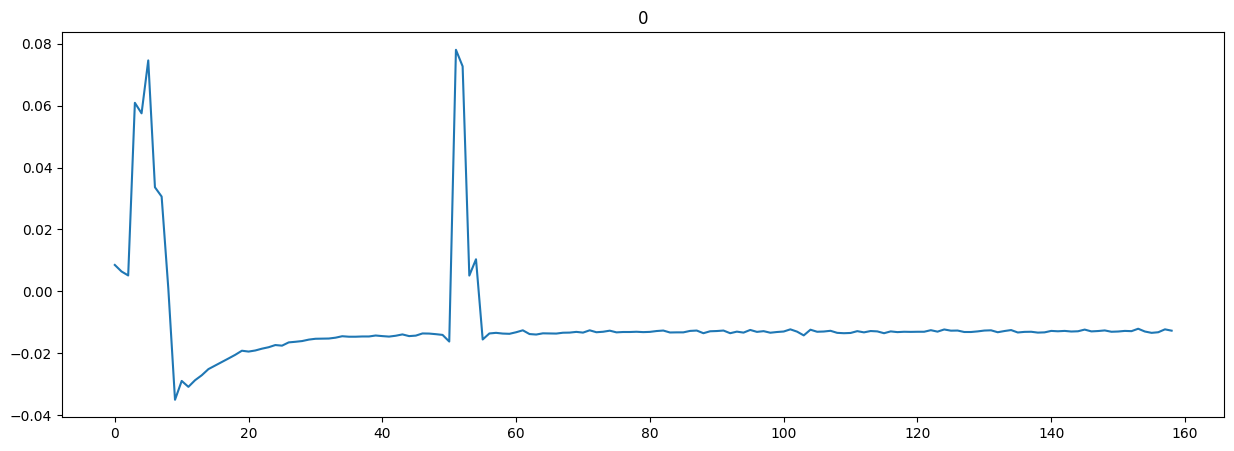

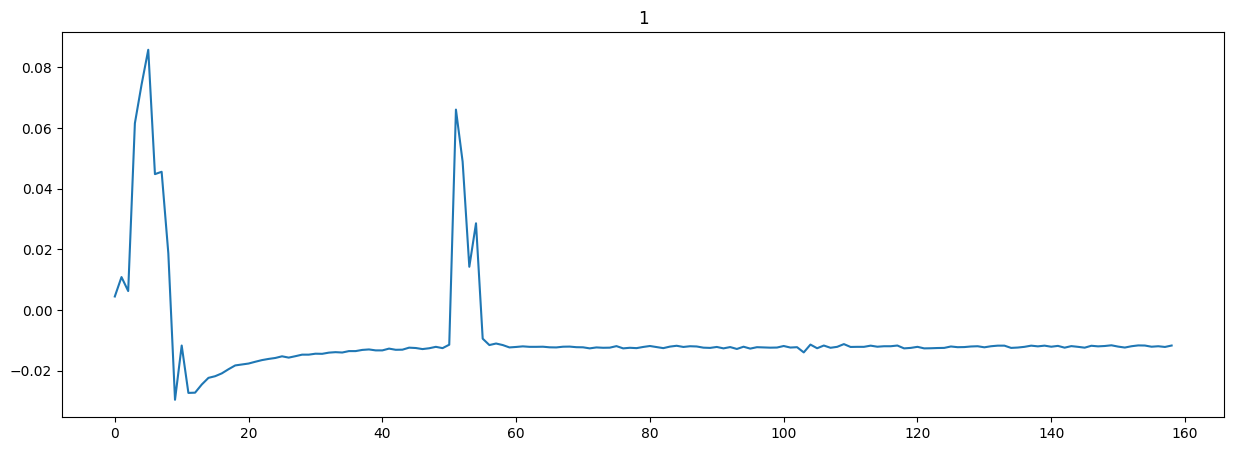

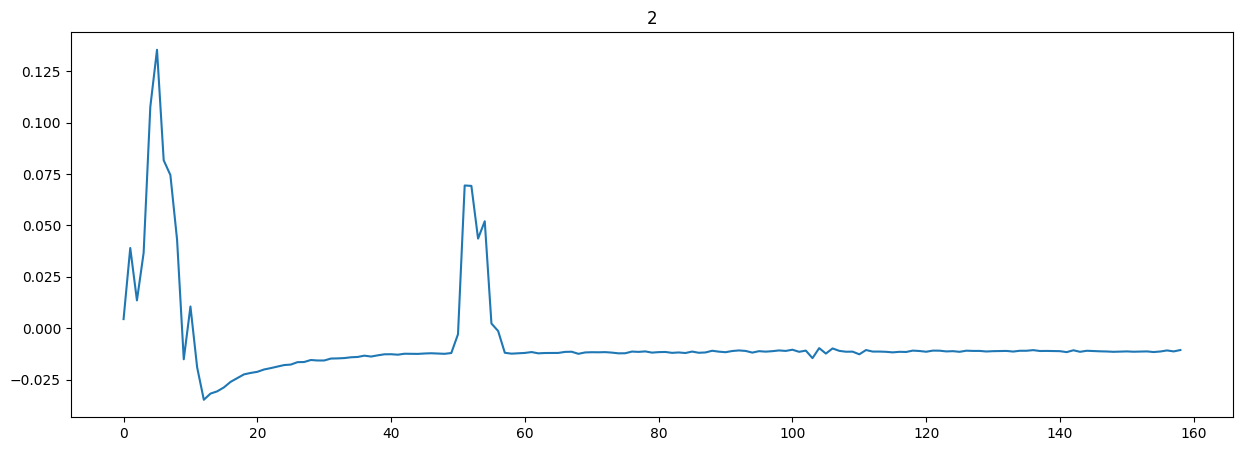

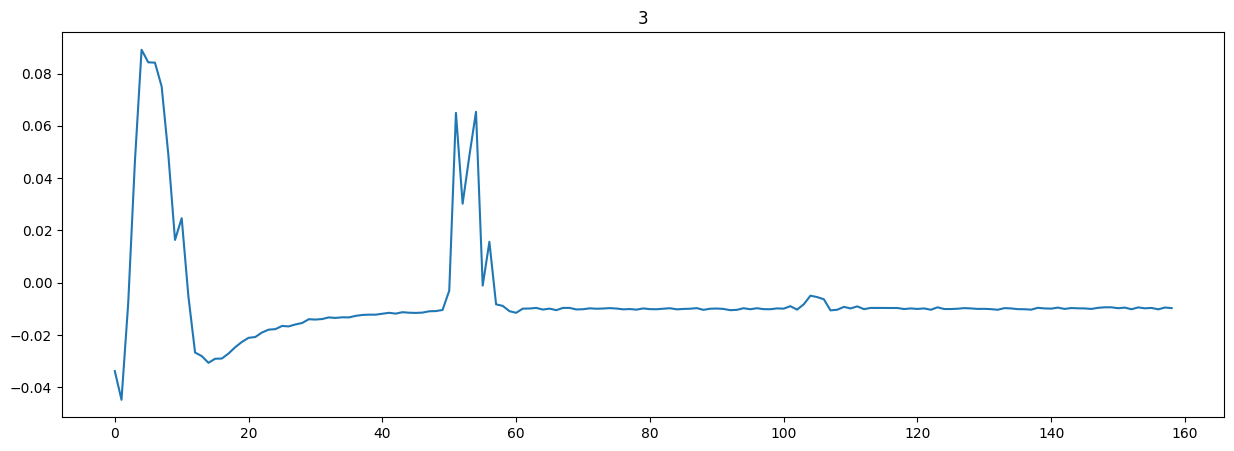

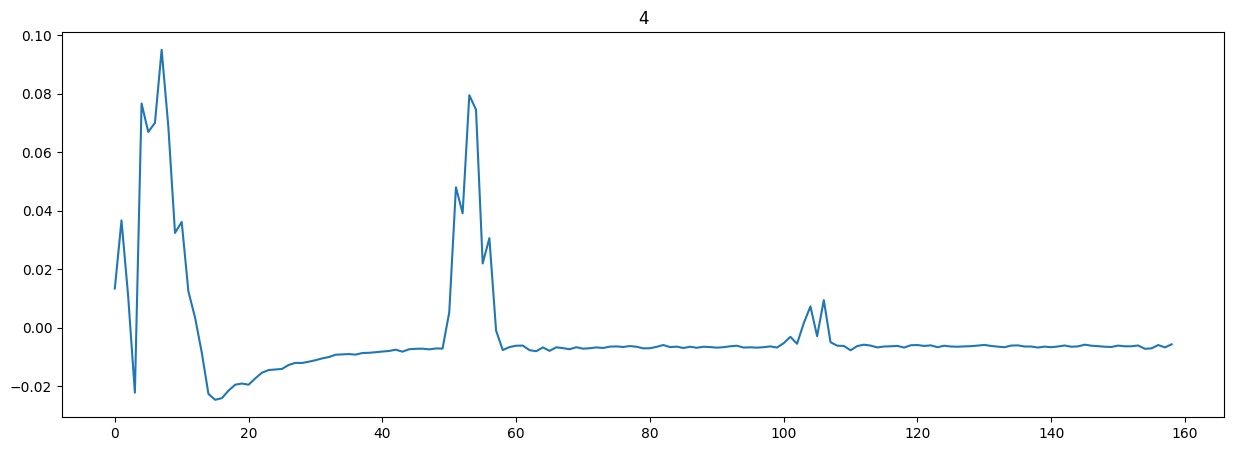

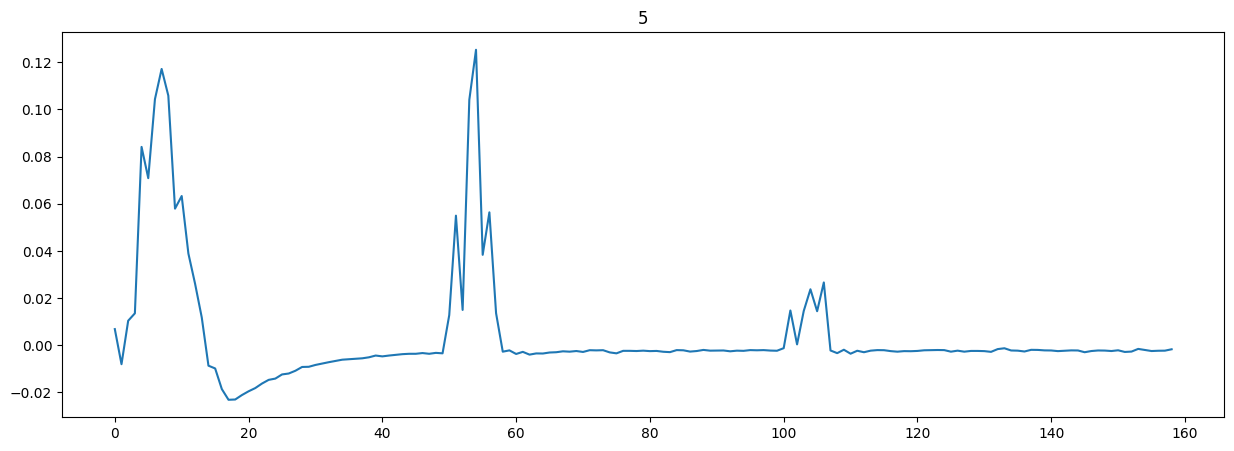

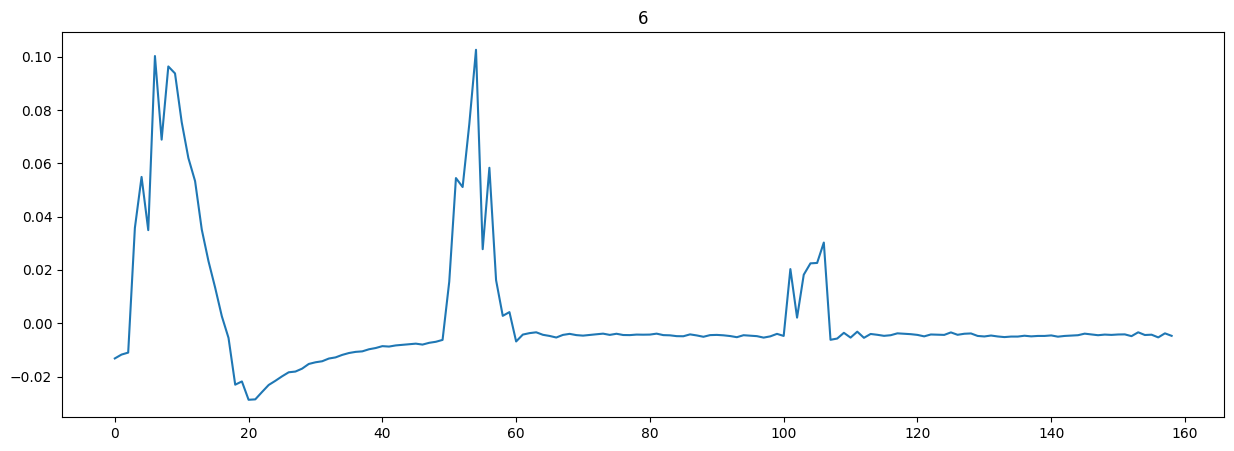

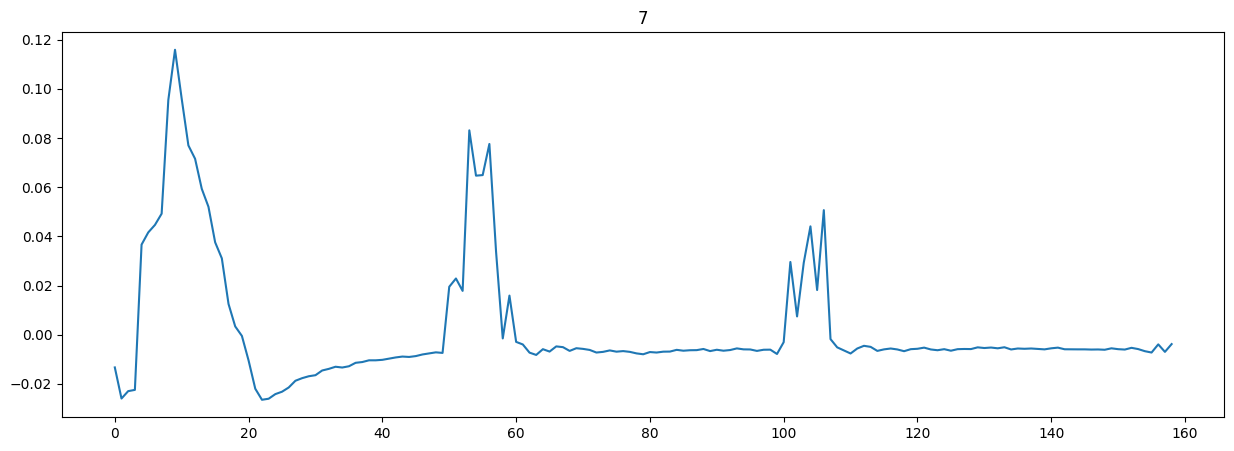

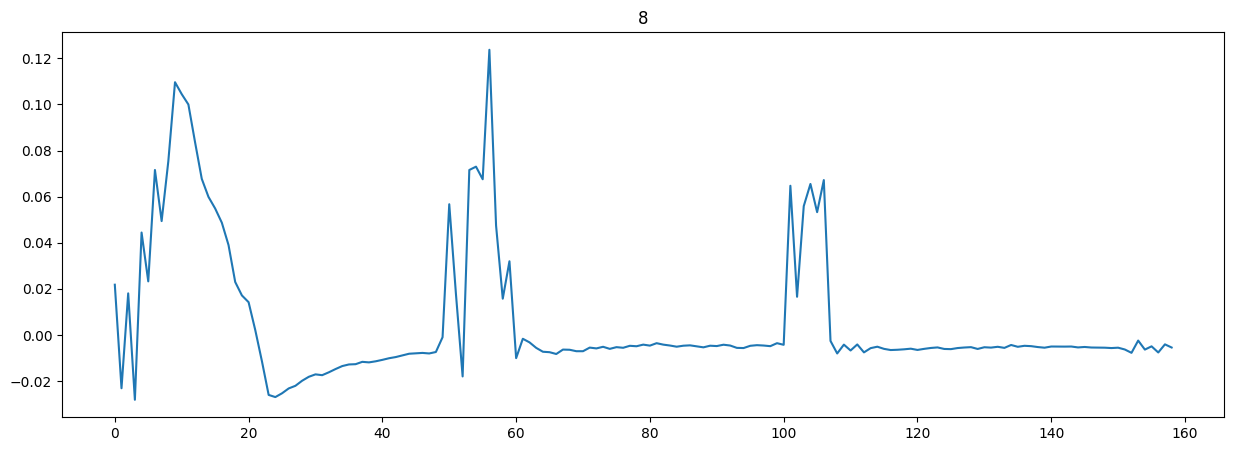

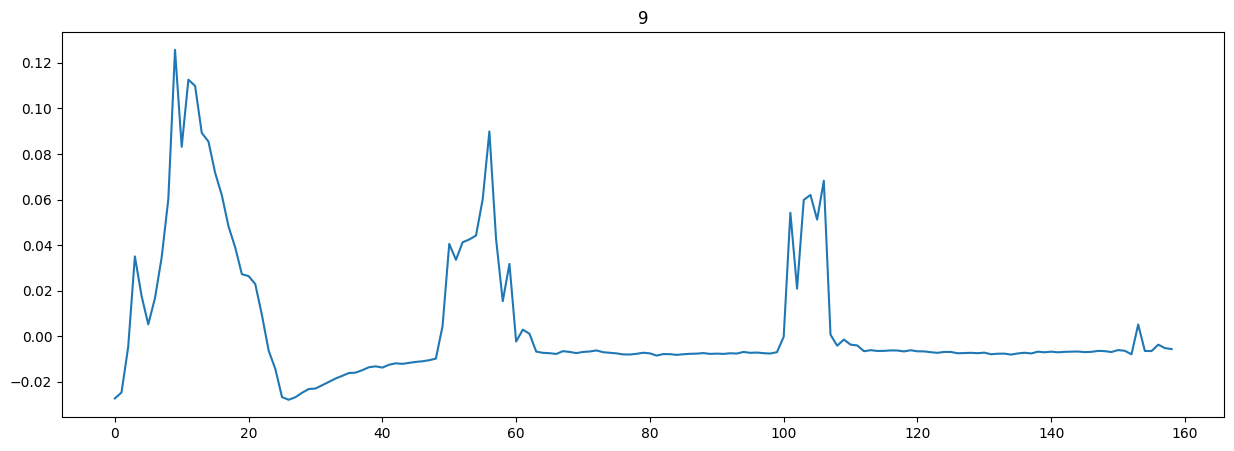

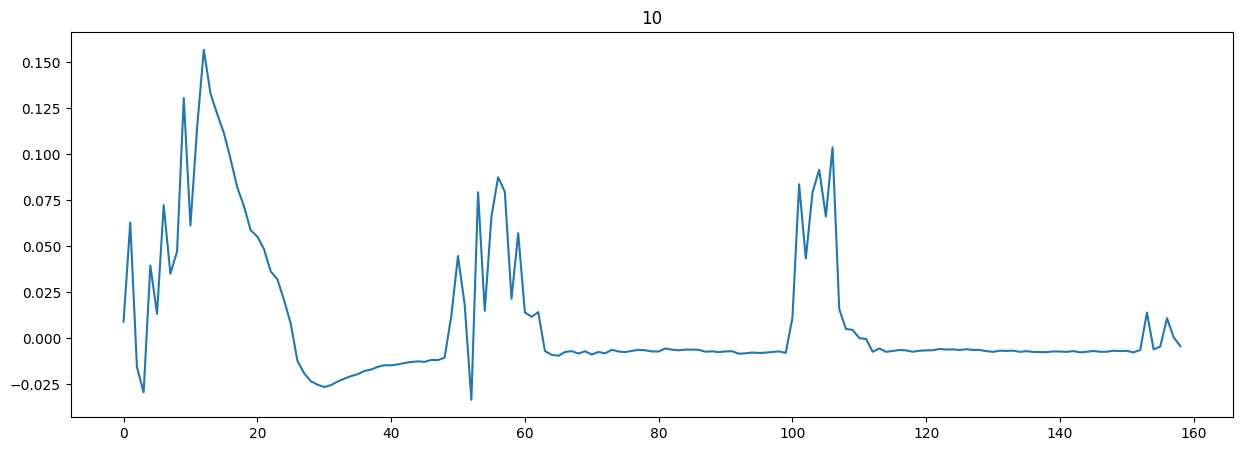

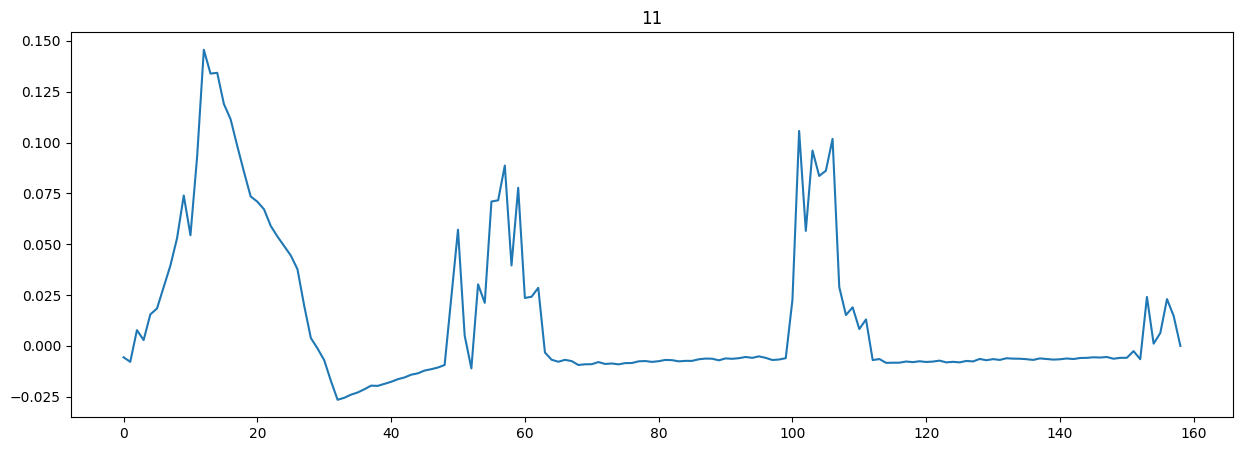

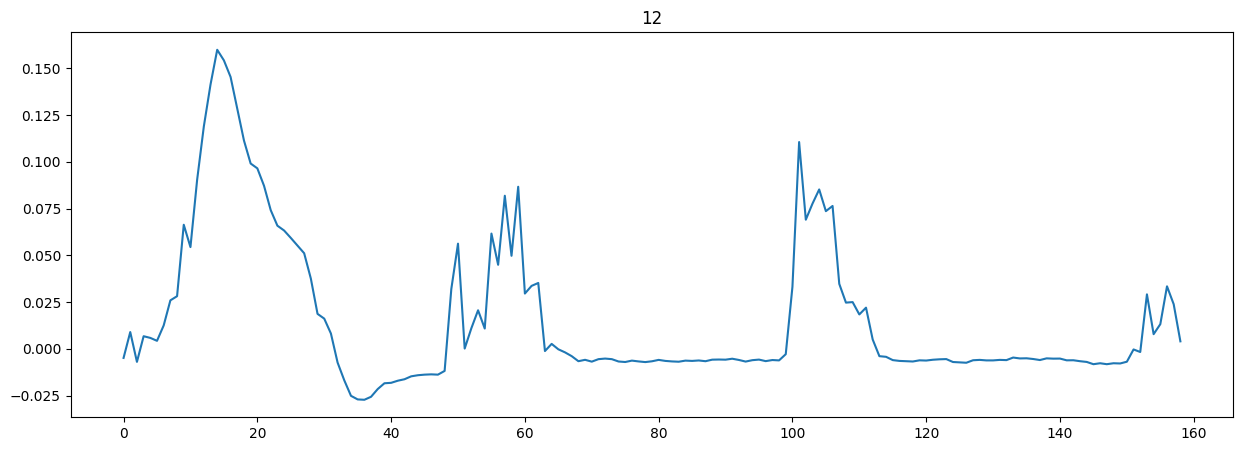

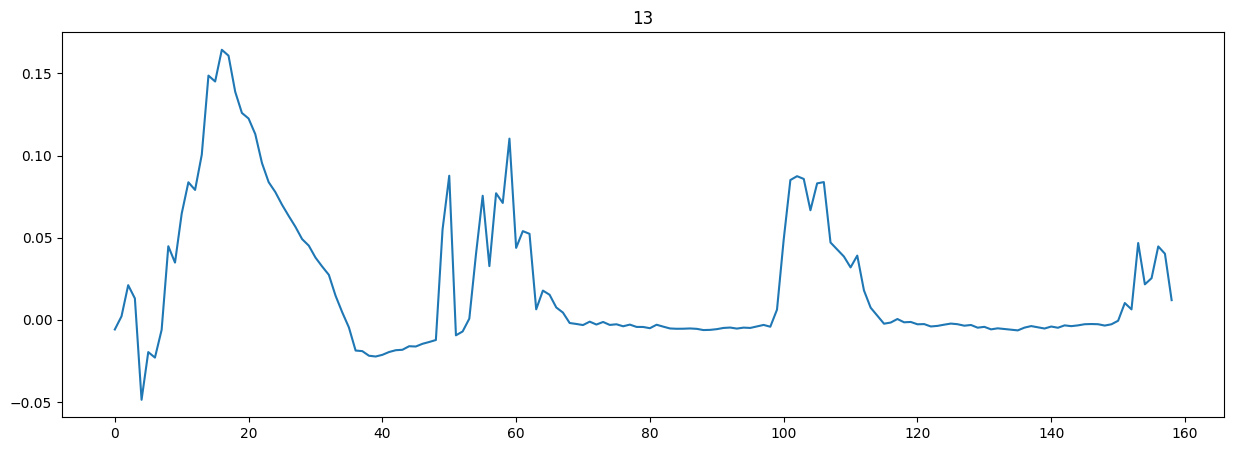

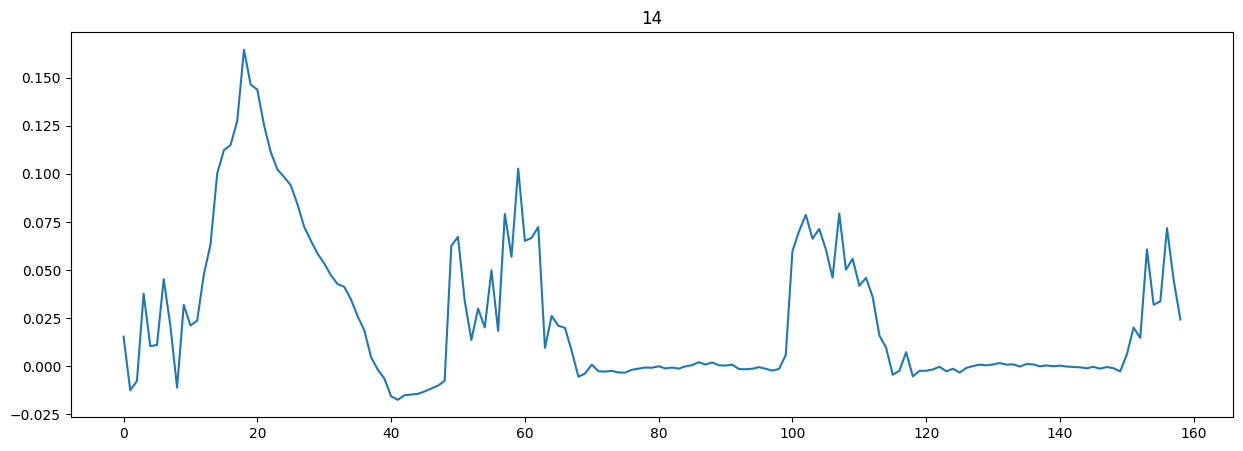

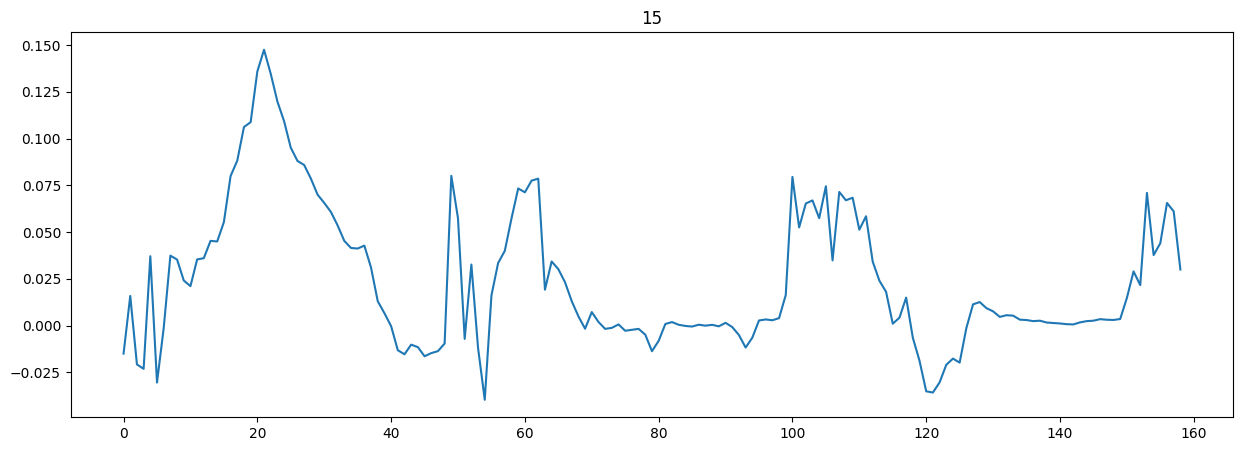

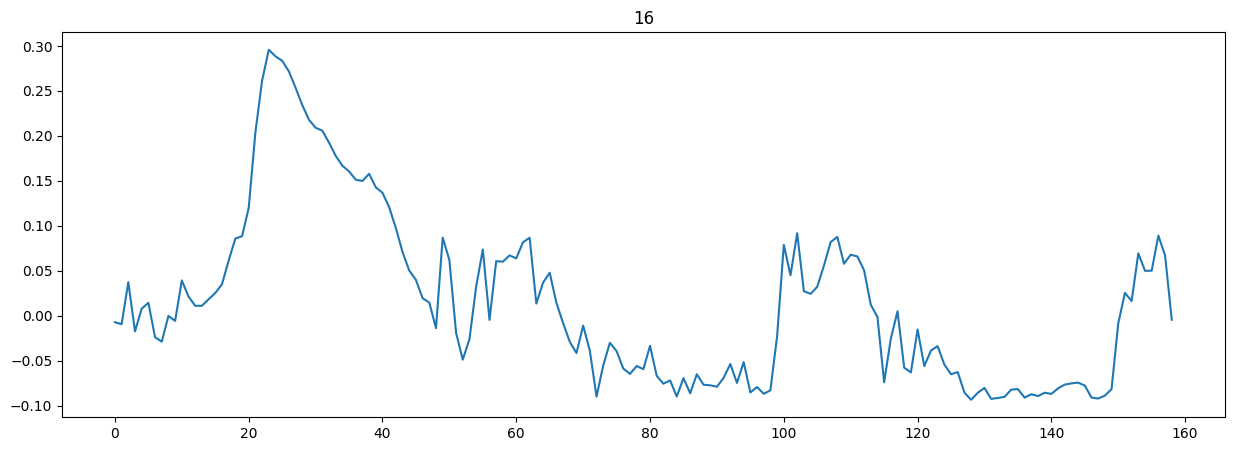

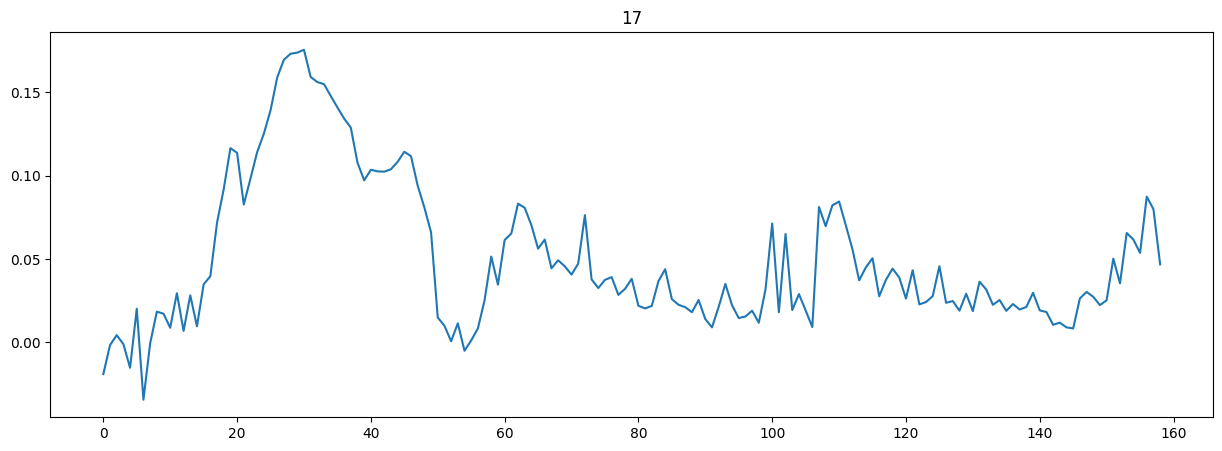

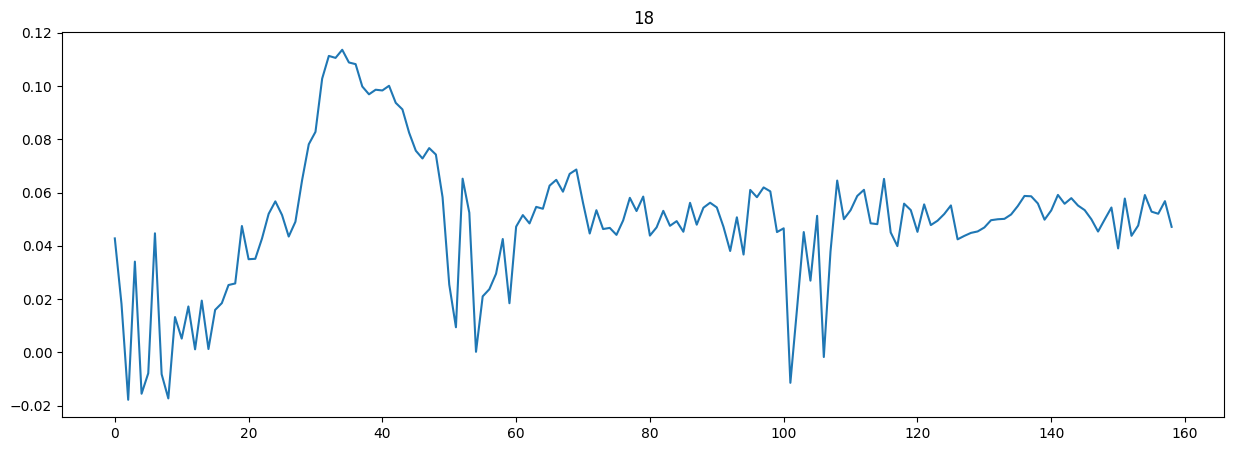

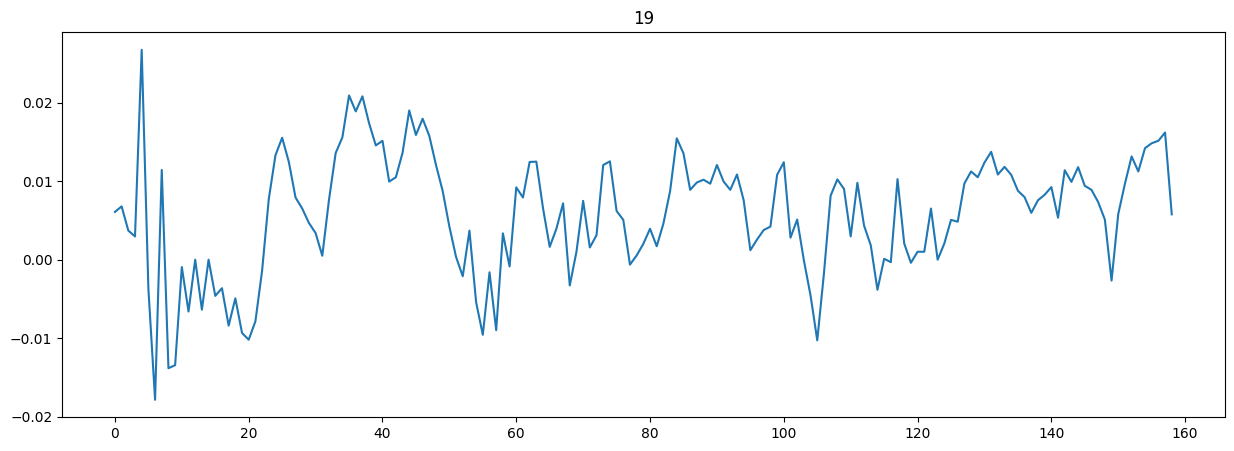

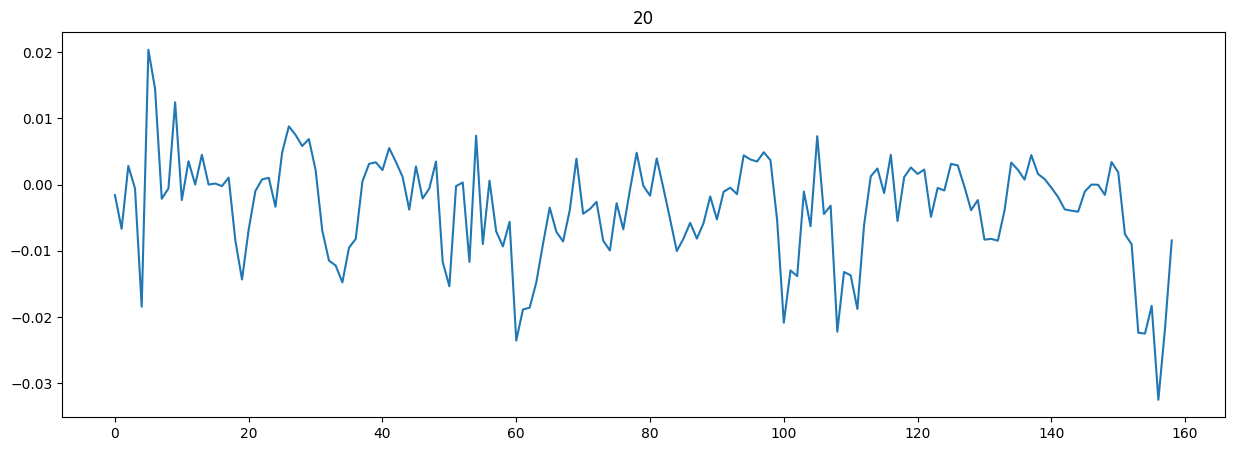

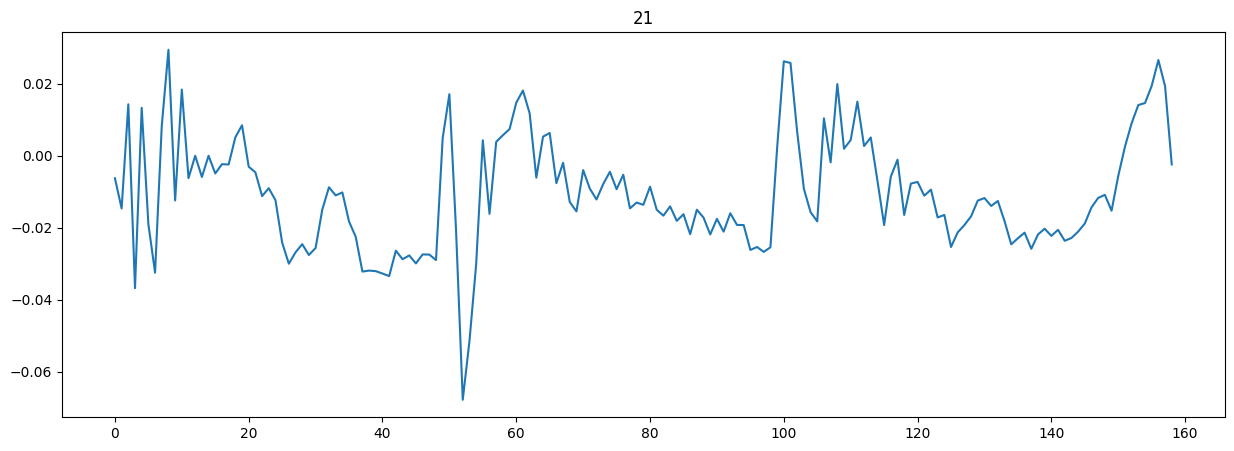

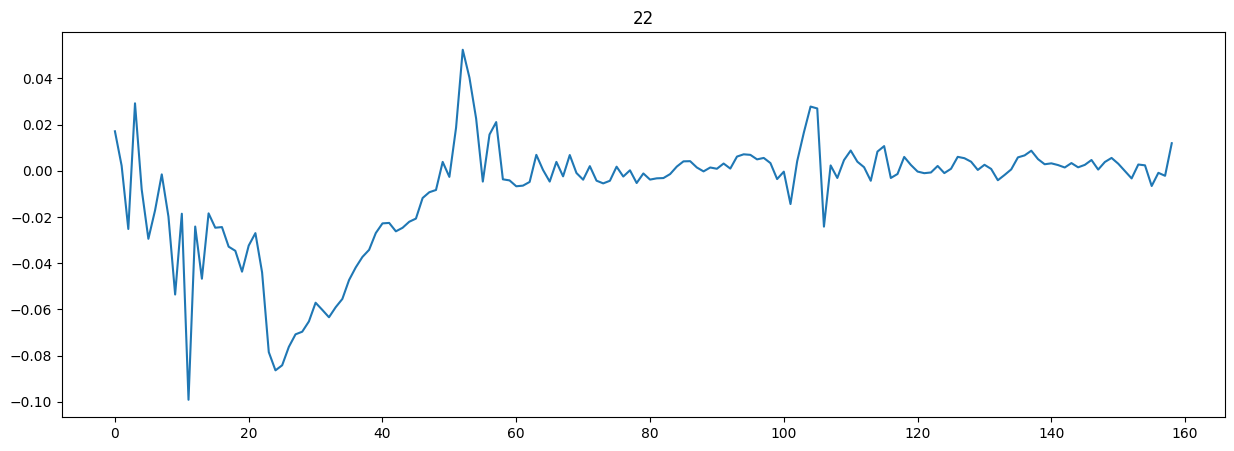

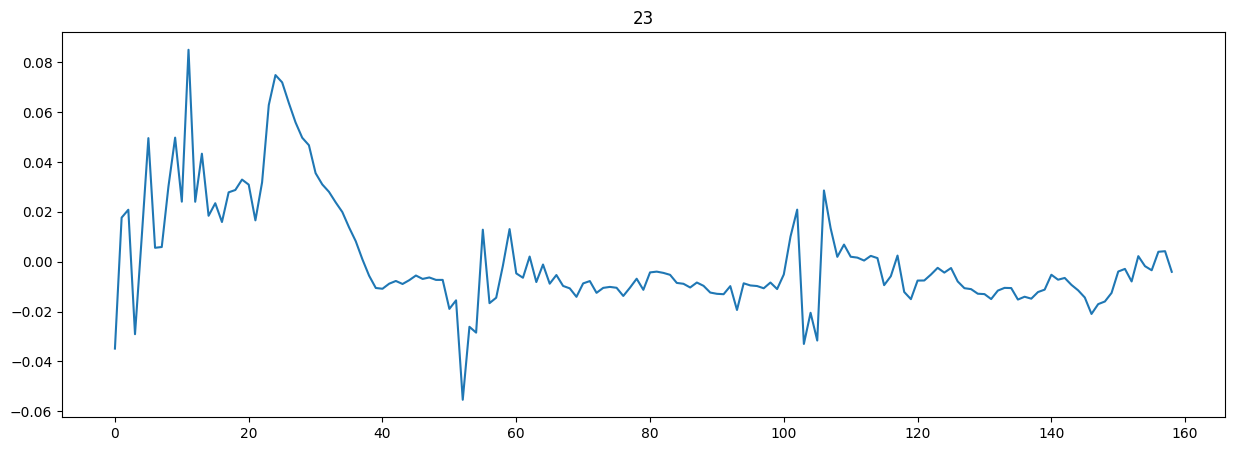

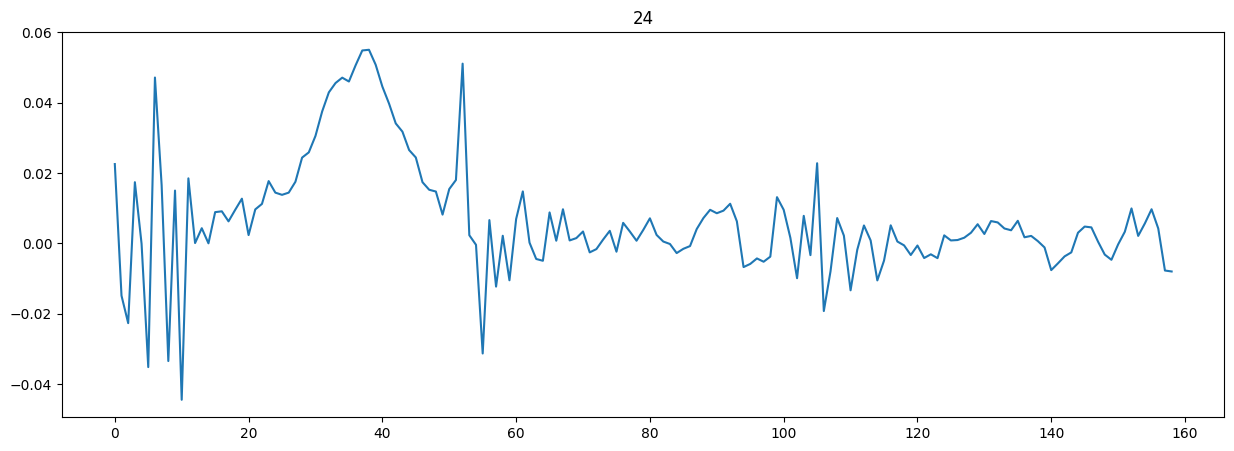

In [47]:
for x in range (len(signals)-1):
    plt.figure(figsize=(15,5))
    plt.plot(H(signals[x+1])-H(signals[x]))
    plt.title(str(x))